<a href="https://colab.research.google.com/github/sudhirslab/beyondllm/blob/main/Chat_with_youtube_video-beyond_llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BeyondLLM

## Build - Rapid Experiment - Evaluate - Repeat

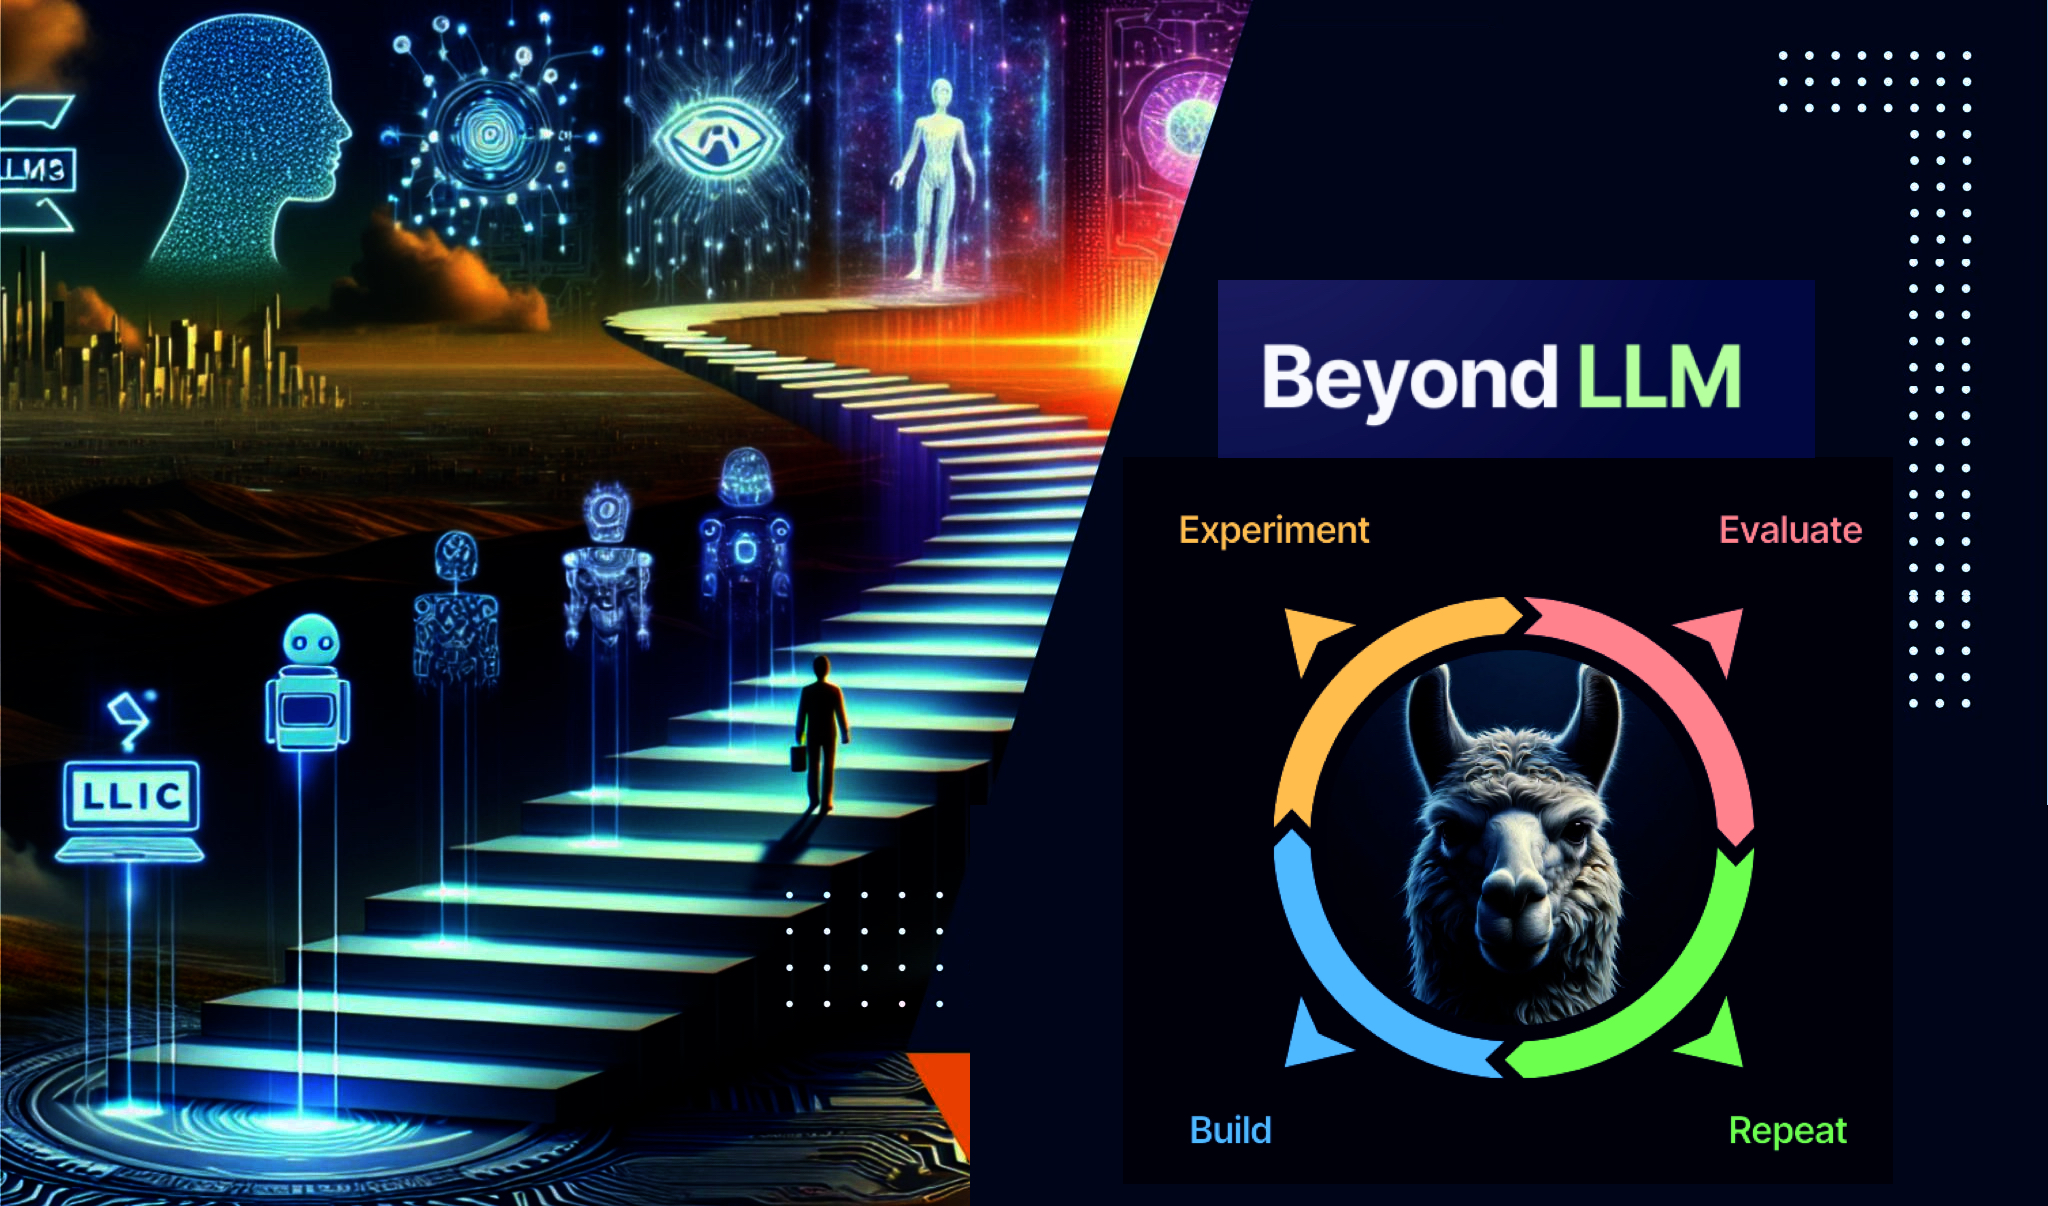

Discovering how to build a Chat with YouTube video RAG app using BeyondLLM in just a few lines of code. This simple process involves:

- Accessing your custom data source.
- Retrieving relevant documents.
- Generating LLM responses.
- Evaluating embeddings.
- Assessing LLM response quality.




## Installation

In [ ]:
!pip install beyondllm

```
Collecting beyondllm
  Downloading beyondllm-0.2.3-py3-none-any.whl.metadata (7.6 kB)
Collecting llama-index==0.10.27 (from beyondllm)
  Downloading llama_index-0.10.27-py3-none-any.whl.metadata (11 kB)
Collecting llama-index-embeddings-gemini==0.1.6 (from beyondllm)
  Downloading llama_index_embeddings_gemini-0.1.6-py3-none-any.whl.metadata (660 bytes)
Requirement already satisfied: nltk==3.8.1 in /usr/local/lib/python3.10/dist-packages (from beyondllm) (3.8.1)
Requirement already satisfied: numpy==1.26.4 in /usr/local/lib/python3.10/dist-packages (from beyondllm) (1.26.4)
Collecting openai==1.20.0 (from beyondllm)
  Downloading openai-1.20.0-py3-none-any.whl.metadata (21 kB)
Collecting pandas==2.0.3 (from beyondllm)
  Downloading pandas-2.0.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Collecting pydantic<2,>=1.10.5 (from beyondllm)
  Downloading pydantic-1.10.18-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (152 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 3.1 MB/s eta 0:00:00
Collecting pypdf==4.2.0 (from beyondllm)
  Downloading pypdf-4.2.0-py3-none-any.whl.metadata (7.4 kB)
Collecting pysbd==0.3.4 (from beyondllm)
  Downloading pysbd-0.3.4-py3-none-any.whl.metadata (6.1 kB)
Collecting pyyaml==6.0.1 (from beyondllm)
  Downloading PyYAML-6.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
Collecting regex==2024.4.16 (from beyondllm)
  Downloading regex-2024.4.16-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 275.4 kB/s eta 0:00:00
Collecting sqlalchemy==2.0.29 (from beyondllm)
  Downloading SQLAlchemy-2.0.29-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.6 kB)
Collecting tiktoken==0.6.0 (from beyondllm)
  Downloading tiktoken-0.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.6 kB)
Collecting llama-index-agent-openai<0.3.0,>=0.1.4 (from llama-index==0.10.27->beyondllm)
  Downloading llama_index_agent_openai-0.2.9-py3-none-any.whl.metadata (729 bytes)
Collecting llama-index-cli<0.2.0,>=0.1.2 (from llama-index==0.10.27->beyondllm)
  Downloading llama_index_cli-0.1.13-py3-none-any.whl.metadata (1.5 kB)
Collecting llama-index-core<0.11.0,>=0.10.27 (from llama-index==0.10.27->beyondllm)
  Downloading llama_index_core-0.10.68.post1-py3-none-any.whl.metadata (2.5 kB)
Collecting llama-index-embeddings-openai<0.2.0,>=0.1.5 (from llama-index==0.10.27->beyondllm)
  Downloading llama_index_embeddings_openai-0.1.11-py3-none-any.whl.metadata (655 bytes)
Collecting llama-index-indices-managed-llama-cloud<0.2.0,>=0.1.2 (from llama-index==0.10.27->beyondllm)
  Downloading llama_index_indices_managed_llama_cloud-0.1.6-py3-none-any.whl.metadata (3.8 kB)
Collecting llama-index-legacy<0.10.0,>=0.9.48 (from llama-index==0.10.27->beyondllm)
  Downloading llama_index_legacy-0.9.48.post3-py3-none-any.whl.metadata (8.5 kB)
Collecting llama-index-llms-openai<0.2.0,>=0.1.13 (from llama-index==0.10.27->beyondllm)
  Downloading llama_index_llms_openai-0.1.31-py3-none-any.whl.metadata (650 bytes)
Collecting llama-index-multi-modal-llms-openai<0.2.0,>=0.1.3 (from llama-index==0.10.27->beyondllm)
  Downloading llama_index_multi_modal_llms_openai-0.1.9-py3-none-any.whl.metadata (728 bytes)
Collecting llama-index-program-openai<0.2.0,>=0.1.3 (from llama-index==0.10.27->beyondllm)
  Downloading llama_index_program_openai-0.1.7-py3-none-any.whl.metadata (760 bytes)
Collecting llama-index-question-gen-openai<0.2.0,>=0.1.2 (from llama-index==0.10.27->beyondllm)
  Downloading llama_index_question_gen_openai-0.1.3-py3-none-any.whl.metadata (785 bytes)
Collecting llama-index-readers-file<0.2.0,>=0.1.4 (from llama-index==0.10.27->beyondllm)
  Downloading llama_index_readers_file-0.1.33-py3-none-any.whl.metadata (5.4 kB)
Collecting llama-index-readers-llama-parse<0.2.0,>=0.1.2 (from llama-index==0.10.27->beyondllm)
  Downloading llama_index_readers_llama_parse-0.1.6-py3-none-any.whl.metadata (3.6 kB)
Collecting google-generativeai<0.5.0,>=0.4.1 (from llama-index-embeddings-gemini==0.1.6->beyondllm)
  Downloading google_generativeai-0.4.1-py3-none-any.whl.metadata (6.2 kB)
Requirement already satisfied: click in /usr/local/lib/python3.10/dist-packages (from nltk==3.8.1->beyondllm) (8.1.7)
Requirement already satisfied: joblib in /usr/local/lib/python3.10/dist-packages (from nltk==3.8.1->beyondllm) (1.4.2)
Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from nltk==3.8.1->beyondllm) (4.66.5)
Requirement already satisfied: anyio<5,>=3.5.0 in /usr/local/lib/python3.10/dist-packages (from openai==1.20.0->beyondllm) (3.7.1)
Requirement already satisfied: distro<2,>=1.7.0 in /usr/lib/python3/dist-packages (from openai==1.20.0->beyondllm) (1.7.0)
Collecting httpx<1,>=0.23.0 (from openai==1.20.0->beyondllm)
  Downloading httpx-0.27.2-py3-none-any.whl.metadata (7.1 kB)
Requirement already satisfied: sniffio in /usr/local/lib/python3.10/dist-packages (from openai==1.20.0->beyondllm) (1.3.1)
Requirement already satisfied: typing-extensions<5,>=4.7 in /usr/local/lib/python3.10/dist-packages (from openai==1.20.0->beyondllm) (4.12.2)
Requirement already satisfied: python-dateutil>=2.8.2 in /usr/local/lib/python3.10/dist-packages (from pandas==2.0.3->beyondllm) (2.8.2)
Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.10/dist-packages (from pandas==2.0.3->beyondllm) (2024.2)
Requirement already satisfied: tzdata>=2022.1 in /usr/local/lib/python3.10/dist-packages (from pandas==2.0.3->beyondllm) (2024.2)
Requirement already satisfied: greenlet!=0.4.17 in /usr/local/lib/python3.10/dist-packages (from sqlalchemy==2.0.29->beyondllm) (3.1.1)
Requirement already satisfied: requests>=2.26.0 in /usr/local/lib/python3.10/dist-packages (from tiktoken==0.6.0->beyondllm) (2.32.3)
Requirement already satisfied: idna>=2.8 in /usr/local/lib/python3.10/dist-packages (from anyio<5,>=3.5.0->openai==1.20.0->beyondllm) (3.10)
Requirement already satisfied: exceptiongroup in /usr/local/lib/python3.10/dist-packages (from anyio<5,>=3.5.0->openai==1.20.0->beyondllm) (1.2.2)
Collecting google-ai-generativelanguage==0.4.0 (from google-generativeai<0.5.0,>=0.4.1->llama-index-embeddings-gemini==0.1.6->beyondllm)
  Downloading google_ai_generativelanguage-0.4.0-py3-none-any.whl.metadata (5.1 kB)
Requirement already satisfied: google-auth>=2.15.0 in /usr/local/lib/python3.10/dist-packages (from google-generativeai<0.5.0,>=0.4.1->llama-index-embeddings-gemini==0.1.6->beyondllm) (2.27.0)
Requirement already satisfied: google-api-core in /usr/local/lib/python3.10/dist-packages (from google-generativeai<0.5.0,>=0.4.1->llama-index-embeddings-gemini==0.1.6->beyondllm) (2.19.2)
Requirement already satisfied: protobuf in /usr/local/lib/python3.10/dist-packages (from google-generativeai<0.5.0,>=0.4.1->llama-index-embeddings-gemini==0.1.6->beyondllm) (3.20.3)
Requirement already satisfied: proto-plus<2.0.0dev,>=1.22.3 in /usr/local/lib/python3.10/dist-packages (from google-ai-generativelanguage==0.4.0->google-generativeai<0.5.0,>=0.4.1->llama-index-embeddings-gemini==0.1.6->beyondllm) (1.24.0)
Requirement already satisfied: certifi in /usr/local/lib/python3.10/dist-packages (from httpx<1,>=0.23.0->openai==1.20.0->beyondllm) (2024.8.30)
Collecting httpcore==1.* (from httpx<1,>=0.23.0->openai==1.20.0->beyondllm)
  Downloading httpcore-1.0.6-py3-none-any.whl.metadata (21 kB)
Collecting h11<0.15,>=0.13 (from httpcore==1.*->httpx<1,>=0.23.0->openai==1.20.0->beyondllm)
  Downloading h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
Requirement already satisfied: aiohttp<4.0.0,>=3.8.6 in /usr/local/lib/python3.10/dist-packages (from llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm) (3.10.10)
Collecting dataclasses-json (from llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm)
  Downloading dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
Requirement already satisfied: deprecated>=1.2.9.3 in /usr/local/lib/python3.10/dist-packages (from llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm) (1.2.14)
Collecting dirtyjson<2.0.0,>=1.0.8 (from llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm)
  Downloading dirtyjson-1.0.8-py3-none-any.whl.metadata (11 kB)
Requirement already satisfied: fsspec>=2023.5.0 in /usr/local/lib/python3.10/dist-packages (from llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm) (2024.6.1)
Requirement already satisfied: nest-asyncio<2.0.0,>=1.5.8 in /usr/local/lib/python3.10/dist-packages (from llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm) (1.6.0)
Requirement already satisfied: networkx>=3.0 in /usr/local/lib/python3.10/dist-packages (from llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm) (3.4.2)
Requirement already satisfied: pillow>=9.0.0 in /usr/local/lib/python3.10/dist-packages (from llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm) (10.4.0)
Collecting tenacity!=8.4.0,<9.0.0,>=8.2.0 (from llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm)
  Downloading tenacity-8.5.0-py3-none-any.whl.metadata (1.2 kB)
Collecting typing-inspect>=0.8.0 (from llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm)
  Downloading typing_inspect-0.9.0-py3-none-any.whl.metadata (1.5 kB)
Requirement already satisfied: wrapt in /usr/local/lib/python3.10/dist-packages (from llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm) (1.16.0)
Collecting llamaindex-py-client<0.2.0,>=0.1.19 (from llama-index-indices-managed-llama-cloud<0.2.0,>=0.1.2->llama-index==0.10.27->beyondllm)
  Downloading llamaindex_py_client-0.1.19-py3-none-any.whl.metadata (760 bytes)
INFO: pip is looking at multiple versions of llama-index-llms-openai to determine which version is compatible with other requirements. This could take a while.
Collecting llama-index-llms-openai<0.2.0,>=0.1.13 (from llama-index==0.10.27->beyondllm)
  Downloading llama_index_llms_openai-0.1.30-py3-none-any.whl.metadata (650 bytes)
  Downloading llama_index_llms_openai-0.1.29-py3-none-any.whl.metadata (650 bytes)
  Downloading llama_index_llms_openai-0.1.28-py3-none-any.whl.metadata (650 bytes)
  Downloading llama_index_llms_openai-0.1.27-py3-none-any.whl.metadata (610 bytes)
Requirement already satisfied: beautifulsoup4<5.0.0,>=4.12.3 in /usr/local/lib/python3.10/dist-packages (from llama-index-readers-file<0.2.0,>=0.1.4->llama-index==0.10.27->beyondllm) (4.12.3)
Collecting striprtf<0.0.27,>=0.0.26 (from llama-index-readers-file<0.2.0,>=0.1.4->llama-index==0.10.27->beyondllm)
  Downloading striprtf-0.0.26-py3-none-any.whl.metadata (2.1 kB)
Collecting llama-parse>=0.4.0 (from llama-index-readers-llama-parse<0.2.0,>=0.1.2->llama-index==0.10.27->beyondllm)
  Downloading llama_parse-0.5.11-py3-none-any.whl.metadata (6.9 kB)
Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.10/dist-packages (from python-dateutil>=2.8.2->pandas==2.0.3->beyondllm) (1.16.0)
Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.10/dist-packages (from requests>=2.26.0->tiktoken==0.6.0->beyondllm) (3.4.0)
Requirement already satisfied: urllib3<3,>=1.21.1 in /usr/local/lib/python3.10/dist-packages (from requests>=2.26.0->tiktoken==0.6.0->beyondllm) (2.2.3)
Requirement already satisfied: aiohappyeyeballs>=2.3.0 in /usr/local/lib/python3.10/dist-packages (from aiohttp<4.0.0,>=3.8.6->llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm) (2.4.3)
Requirement already satisfied: aiosignal>=1.1.2 in /usr/local/lib/python3.10/dist-packages (from aiohttp<4.0.0,>=3.8.6->llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm) (1.3.1)
Requirement already satisfied: attrs>=17.3.0 in /usr/local/lib/python3.10/dist-packages (from aiohttp<4.0.0,>=3.8.6->llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm) (24.2.0)
Requirement already satisfied: frozenlist>=1.1.1 in /usr/local/lib/python3.10/dist-packages (from aiohttp<4.0.0,>=3.8.6->llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm) (1.4.1)
Requirement already satisfied: multidict<7.0,>=4.5 in /usr/local/lib/python3.10/dist-packages (from aiohttp<4.0.0,>=3.8.6->llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm) (6.1.0)
Requirement already satisfied: yarl<2.0,>=1.12.0 in /usr/local/lib/python3.10/dist-packages (from aiohttp<4.0.0,>=3.8.6->llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm) (1.16.0)
Requirement already satisfied: async-timeout<5.0,>=4.0 in /usr/local/lib/python3.10/dist-packages (from aiohttp<4.0.0,>=3.8.6->llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm) (4.0.3)
Requirement already satisfied: soupsieve>1.2 in /usr/local/lib/python3.10/dist-packages (from beautifulsoup4<5.0.0,>=4.12.3->llama-index-readers-file<0.2.0,>=0.1.4->llama-index==0.10.27->beyondllm) (2.6)
Requirement already satisfied: googleapis-common-protos<2.0.dev0,>=1.56.2 in /usr/local/lib/python3.10/dist-packages (from google-api-core->google-generativeai<0.5.0,>=0.4.1->llama-index-embeddings-gemini==0.1.6->beyondllm) (1.65.0)
Requirement already satisfied: cachetools<6.0,>=2.0.0 in /usr/local/lib/python3.10/dist-packages (from google-auth>=2.15.0->google-generativeai<0.5.0,>=0.4.1->llama-index-embeddings-gemini==0.1.6->beyondllm) (5.5.0)
Requirement already satisfied: pyasn1-modules>=0.2.1 in /usr/local/lib/python3.10/dist-packages (from google-auth>=2.15.0->google-generativeai<0.5.0,>=0.4.1->llama-index-embeddings-gemini==0.1.6->beyondllm) (0.4.1)
Requirement already satisfied: rsa<5,>=3.1.4 in /usr/local/lib/python3.10/dist-packages (from google-auth>=2.15.0->google-generativeai<0.5.0,>=0.4.1->llama-index-embeddings-gemini==0.1.6->beyondllm) (4.9)
INFO: pip is looking at multiple versions of llama-parse to determine which version is compatible with other requirements. This could take a while.
  Downloading llama_parse-0.5.10-py3-none-any.whl.metadata (6.9 kB)
  Downloading llama_parse-0.5.9-py3-none-any.whl.metadata (6.9 kB)
  Downloading llama_parse-0.5.8-py3-none-any.whl.metadata (6.4 kB)
  Downloading llama_parse-0.5.7-py3-none-any.whl.metadata (6.4 kB)
  Downloading llama_parse-0.5.6-py3-none-any.whl.metadata (6.1 kB)
  Downloading llama_parse-0.5.5-py3-none-any.whl.metadata (6.1 kB)
  Downloading llama_parse-0.5.4-py3-none-any.whl.metadata (6.1 kB)
INFO: pip is still looking at multiple versions of llama-parse to determine which version is compatible with other requirements. This could take a while.
  Downloading llama_parse-0.5.3-py3-none-any.whl.metadata (4.5 kB)
  Downloading llama_parse-0.5.2-py3-none-any.whl.metadata (4.5 kB)
  Downloading llama_parse-0.5.1-py3-none-any.whl.metadata (4.5 kB)
  Downloading llama_parse-0.5.0-py3-none-any.whl.metadata (4.4 kB)
  Downloading llama_parse-0.4.9-py3-none-any.whl.metadata (4.4 kB)
Collecting mypy-extensions>=0.3.0 (from typing-inspect>=0.8.0->llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm)
  Downloading mypy_extensions-1.0.0-py3-none-any.whl.metadata (1.1 kB)
Collecting marshmallow<4.0.0,>=3.18.0 (from dataclasses-json->llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm)
  Downloading marshmallow-3.23.0-py3-none-any.whl.metadata (7.6 kB)
Requirement already satisfied: grpcio<2.0dev,>=1.33.2 in /usr/local/lib/python3.10/dist-packages (from google-api-core[grpc]!=2.0.*,!=2.1.*,!=2.10.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,!=2.9.*,<3.0.0dev,>=1.34.0->google-ai-generativelanguage==0.4.0->google-generativeai<0.5.0,>=0.4.1->llama-index-embeddings-gemini==0.1.6->beyondllm) (1.64.1)
Requirement already satisfied: grpcio-status<2.0.dev0,>=1.33.2 in /usr/local/lib/python3.10/dist-packages (from google-api-core[grpc]!=2.0.*,!=2.1.*,!=2.10.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,!=2.9.*,<3.0.0dev,>=1.34.0->google-ai-generativelanguage==0.4.0->google-generativeai<0.5.0,>=0.4.1->llama-index-embeddings-gemini==0.1.6->beyondllm) (1.48.2)
Requirement already satisfied: packaging>=17.0 in /usr/local/lib/python3.10/dist-packages (from marshmallow<4.0.0,>=3.18.0->dataclasses-json->llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm) (24.1)
Requirement already satisfied: pyasn1<0.7.0,>=0.4.6 in /usr/local/lib/python3.10/dist-packages (from pyasn1-modules>=0.2.1->google-auth>=2.15.0->google-generativeai<0.5.0,>=0.4.1->llama-index-embeddings-gemini==0.1.6->beyondllm) (0.6.1)
Requirement already satisfied: propcache>=0.2.0 in /usr/local/lib/python3.10/dist-packages (from yarl<2.0,>=1.12.0->aiohttp<4.0.0,>=3.8.6->llama-index-core<0.11.0,>=0.10.27->llama-index==0.10.27->beyondllm) (0.2.0)
Downloading beyondllm-0.2.3-py3-none-any.whl (54 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.5 MB/s eta 0:00:00
Downloading llama_index-0.10.27-py3-none-any.whl (6.9 kB)
Downloading llama_index_embeddings_gemini-0.1.6-py3-none-any.whl (2.9 kB)
Downloading openai-1.20.0-py3-none-any.whl (292 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 12.8 MB/s eta 0:00:00
Downloading pandas-2.0.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 35.9 MB/s eta 0:00:00
Downloading pypdf-4.2.0-py3-none-any.whl (290 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 16.6 MB/s eta 0:00:00
Downloading pysbd-0.3.4-py3-none-any.whl (71 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 4.3 MB/s eta 0:00:00
Downloading PyYAML-6.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (705 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 19.7 MB/s eta 0:00:00
Downloading regex-2024.4.16-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (773 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 26.5 MB/s eta 0:00:00
Downloading SQLAlchemy-2.0.29-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.6 MB/s eta 0:00:00
Downloading tiktoken-0.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.7 MB/s eta 0:00:00
Downloading pydantic-1.10.18-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.5 MB/s eta 0:00:00
Downloading google_generativeai-0.4.1-py3-none-any.whl (137 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 6.7 MB/s eta 0:00:00
Downloading google_ai_generativelanguage-0.4.0-py3-none-any.whl (598 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.7/598.7 kB 21.8 MB/s eta 0:00:00
Downloading httpx-0.27.2-py3-none-any.whl (76 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.2 MB/s eta 0:00:00
Downloading httpcore-1.0.6-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.9 MB/s eta 0:00:00
Downloading llama_index_agent_openai-0.2.9-py3-none-any.whl (13 kB)
Downloading llama_index_cli-0.1.13-py3-none-any.whl (27 kB)
Downloading llama_index_core-0.10.68.post1-py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.3 MB/s eta 0:00:00
Downloading llama_index_embeddings_openai-0.1.11-py3-none-any.whl (6.3 kB)
Downloading llama_index_indices_managed_llama_cloud-0.1.6-py3-none-any.whl (6.7 kB)
Downloading llama_index_legacy-0.9.48.post3-py3-none-any.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.9 MB/s eta 0:00:00
Downloading llama_index_llms_openai-0.1.27-py3-none-any.whl (11 kB)
Downloading llama_index_multi_modal_llms_openai-0.1.9-py3-none-any.whl (5.9 kB)
Downloading llama_index_program_openai-0.1.7-py3-none-any.whl (5.3 kB)
Downloading llama_index_question_gen_openai-0.1.3-py3-none-any.whl (2.9 kB)
Downloading llama_index_readers_file-0.1.33-py3-none-any.whl (38 kB)
Downloading llama_index_readers_llama_parse-0.1.6-py3-none-any.whl (2.5 kB)
Downloading dirtyjson-1.0.8-py3-none-any.whl (25 kB)
Downloading llama_parse-0.4.9-py3-none-any.whl (9.4 kB)
Downloading llamaindex_py_client-0.1.19-py3-none-any.whl (141 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.7 MB/s eta 0:00:00
Downloading striprtf-0.0.26-py3-none-any.whl (6.9 kB)
Downloading tenacity-8.5.0-py3-none-any.whl (28 kB)
Downloading typing_inspect-0.9.0-py3-none-any.whl (8.8 kB)
Downloading dataclasses_json-0.6.7-py3-none-any.whl (28 kB)
Downloading h11-0.14.0-py3-none-any.whl (58 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.8 MB/s eta 0:00:00
Downloading marshmallow-3.23.0-py3-none-any.whl (49 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00
Downloading mypy_extensions-1.0.0-py3-none-any.whl (4.7 kB)
Installing collected packages: striprtf, dirtyjson, tenacity, sqlalchemy, regex, pyyaml, pysbd, pypdf, pydantic, mypy-extensions, marshmallow, h11, typing-inspect, tiktoken, pandas, httpcore, httpx, dataclasses-json, openai, llamaindex-py-client, llama-index-core, llama-parse, llama-index-readers-file, llama-index-llms-openai, llama-index-legacy, llama-index-indices-managed-llama-cloud, llama-index-embeddings-openai, google-ai-generativelanguage, llama-index-readers-llama-parse, llama-index-multi-modal-llms-openai, llama-index-cli, llama-index-agent-openai, google-generativeai, llama-index-program-openai, llama-index-embeddings-gemini, llama-index-question-gen-openai, llama-index, beyondllm
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: regex
    Found existing installation: regex 2024.9.11
    Uninstalling regex-2024.9.11:
      Successfully uninstalled regex-2024.9.11
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.2
    Uninstalling PyYAML-6.0.2:
      Successfully uninstalled PyYAML-6.0.2
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.9.2
    Uninstalling pydantic-2.9.2:
      Successfully uninstalled pydantic-2.9.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.10
    Uninstalling google-ai-generativelanguage-0.6.10:
      Successfully uninstalled google-ai-generativelanguage-0.6.10
  Attempting uninstall: google-generativeai
    Found existing installation: google-generativeai 0.8.3
    Uninstalling google-generativeai-0.8.3:
      Successfully uninstalled google-generativeai-0.8.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.15 requires pydantic>=2.7.0, but you have pydantic 1.10.18 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 2.0.3 which is incompatible.
plotnine 0.13.6 requires pandas<3.0.0,>=2.1.0, but you have pandas 2.0.3 which is incompatible.
xarray 2024.9.0 requires pandas>=2.1, but you have pandas 2.0.3 which is incompatible.
Successfully installed beyondllm-0.2.3 dataclasses-json-0.6.7 dirtyjson-1.0.8 google-ai-generativelanguage-0.4.0 google-generativeai-0.4.1 h11-0.14.0 httpcore-1.0.6 httpx-0.27.2 llama-index-0.10.27 llama-index-agent-openai-0.2.9 llama-index-cli-0.1.13 llama-index-core-0.10.68.post1 llama-index-embeddings-gemini-0.1.6 llama-index-embeddings-openai-0.1.11 llama-index-indices-managed-llama-cloud-0.1.6 llama-index-legacy-0.9.48.post3 llama-index-llms-openai-0.1.27 llama-index-multi-modal-llms-openai-0.1.9 llama-index-program-openai-0.1.7 llama-index-question-gen-openai-0.1.3 llama-index-readers-file-0.1.33 llama-index-readers-llama-parse-0.1.6 llama-parse-0.4.9 llamaindex-py-client-0.1.19 marshmallow-3.23.0 mypy-extensions-1.0.0 openai-1.20.0 pandas-2.0.3 pydantic-1.10.18 pypdf-4.2.0 pysbd-0.3.4 pyyaml-6.0.1 regex-2024.4.16 sqlalchemy-2.0.29 striprtf-0.0.26 tenacity-8.5.0 tiktoken-0.6.0 typing-inspect-0.9.0
WARNING: The following packages were previously imported in this runtime:
  [google]
You must restart the runtime in order to use newly installed versions.
```

## Import BeyondLLM

In [ ]:
from beyondllm import source,retrieve,embeddings,llms,generator

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /usr/local/lib/python3.10/dist-
[nltk_data]     packages/llama_index/core/_static/nltk_cache...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.

In [ ]:
from getpass import getpass
import os

# You need GOOGLE_API_KEY from your goole cloud to run the application
os.environ['GOOGLE_API_KEY'] = getpass()

··········


## Chat with YouTube Video

### Approach-1: Using Default LLM and Embeddings

Build customised RAG in less than 5 lines of code using BeyondLLM.

YouTube is not a default datatype, thats where you need to install it

```
pip install youtube_transcript_api,llama-index-readers-youtube-transcript
```

In [ ]:
# Read youtube video
data = source.fit("https://www.youtube.com/watch?v=inY94P0shd0",dtype="youtube",chunk_size=1024,chunk_overlap=0)

The feature you're trying to use requires an additional library(s):youtube_transcript_api,llama-index-readers-youtube-transcript. Would you like to install it now? [y/N]: y


In [ ]:
print(data)

In [ ]:
retriever = retrieve.auto_retriever(data,type="normal",top_k=3)

In [ ]:
pipeline = generator.Generate(question="what tool is video mentioning about?",retriever=retriever)

LLM is explicitly disabled. Using MockLLM.


In [ ]:
print(pipeline.call())

Jupiter


## Gradio Integration

In [ ]:
# Install gradio UI package
!pip install gradio

In [ ]:
import gradio as gr

def predict(message, history, system_prompt, tokens):
  response =  pipeline.call()
  return response

with gr.Blocks() as demo:
    chatbot = gr.Chatbot()
    msg = gr.Textbox()
    clear = gr.ClearButton([msg, chatbot])

    def predict(message, chat_history):
      response = pipeline.call()
      chat_history.append((message, response))
      return "", chat_history


    msg.submit(predict, [msg, chatbot], [msg, chatbot])

demo.launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://097ff104d345ecf034.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
